## Exploration

This notebook performs an initial exploratory analysis of the dataset.

Goal:
- understand the structure and quality of the data
- examine basic distributions
- identify potential confounding variables

In [1]:
#!pip install xlrd

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting seaborn plot style (white background, grey lines)
sns.set(style="whitegrid")

In [3]:
#loading the dataset

#!!! dependency: xlrd

df = pd.read_excel("../data/bdnf_data.xls")

# Team Code

team code: \
1 = controls \
2 = MDD \
3 = schizophrenia

In [4]:
df.head()

,Unnamed: 0,age,kg,m,BMI,BDNF,obesity,AA,GA,GG,female,male,team code
0,0,19,68.0,1.74,22.460034,12.292,0,0,1,0,1,0,1
1,1,19,63.0,1.64,23.423557,8.073,0,0,1,0,1,0,1
2,2,19,48.0,1.57,19.473407,8.073,0,0,1,0,1,0,1
3,3,19,54.0,1.52,23.372576,4.808,0,0,1,0,1,0,1
4,4,19,55.0,1.62,20.957171,12.191,0,1,0,0,1,0,1


In [5]:
#df.info()

df.columns

Index(['Unnamed: 0', 'age', 'kg', 'm', 'BMI', 'BDNF', 'obesity', 'AA', 'GA',
       'GG', 'female', 'male', 'team code'],
      dtype='object')

The dataset seems to include genotype variables as columns (AA, GA, GG), which will not be taken into considerations in this analysis for now.

In [6]:
#rows, columns
df.shape

(788, 13)

Dataset contains **788** observations and **13** variables (3 of them are genotypes)

## Variable Overview

Variables of interest for this project in the dataset:
- serum BDNF concentration (BDNF)
- diagnostic group (team code) -> 1: controls, 2: MDD, 3: schizophrenia
- age (years)
- sex
- BMI

In [7]:
#df["team code"].value_counts()

#checking how many entries there are grouped by "group type"
df["team code"].map({1: "Control", 2: "MDD", 3: "Schizophrenia"}).value_counts()

team code
Control          417
MDD              210
Schizophrenia    161
Name: count, dtype: int64

The amount of entries varies depending on the group type. There is a clear imbalance between the amount of entries for each group

As follows:

Control: 417 entries \
MDD: 210 entries \
Schizophrenia: 161 entries

In [8]:
#df.describe()

#group by team code (groups) and describe the BDNF differences
df.groupby("team code")["BDNF"].describe()

,count,mean,std,min,25%,50%,75%,max
team code,,,,,,,,
1,417.0,9.568853,7.007338,0.067143,5.16100,8.230667,12.2920,75.925
2,210.0,7.806189,6.174260,0.134000,2.91025,6.541000,11.4575,37.870
3,161.0,9.342487,5.767988,0.465000,4.95700,8.091502,12.6880,26.167


In [9]:
df.isnull().sum()

Unnamed: 0    0
age           0
kg            0
m             0
BMI           0
BDNF          0
obesity       0
AA            0
GA            0
GG            0
female        0
male          0
team code     0
dtype: int64

There seems to be no missing values in this dataset for any variable.

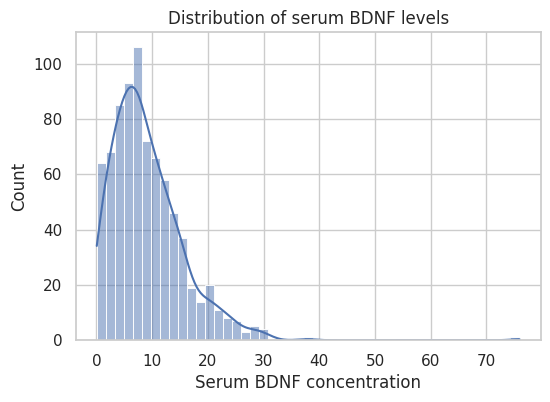

In [10]:
#plotting the overall concentration of BDNF across all observations

plt.figure(figsize=(6,4))
sns.histplot(df["BDNF"], kde=True)
plt.xlabel("Serum BDNF concentration")
plt.title("Distribution of serum BDNF levels")
plt.show()

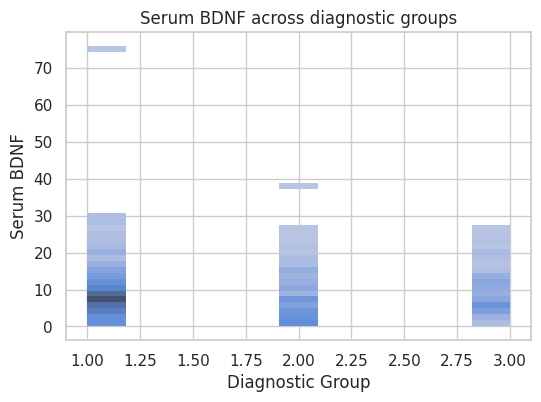

In [11]:
#plotting distribution of BDNF by diagnostic group

plt.figure(figsize=(6,4))
sns.histplot(x="team code", y="BDNF", data=df)
plt.xlabel("Diagnostic Group")
plt.ylabel("Serum BDNF")
plt.title("Serum BDNF across diagnostic groups")
plt.show()

from what difference on is the difference significant in these levels?

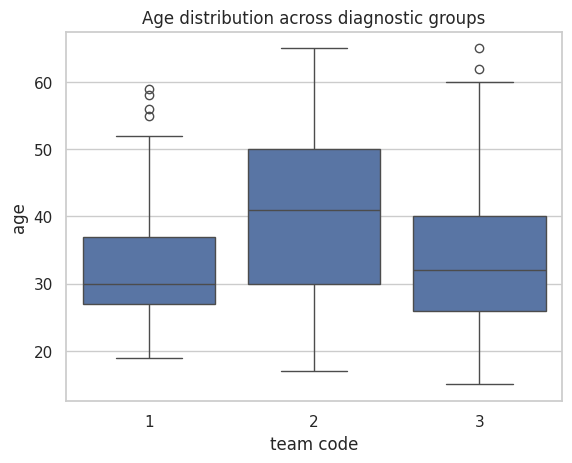

In [12]:
#plotting age distribution across diagnostic groups

sns.boxplot(x="team code", y="age", data=df)
plt.title("Age distribution across diagnostic groups")
plt.show()

## Age per Group
It seems like the mean age for the control group is the lowest, this might be a factor playing into role of the overall BDNF concentration.

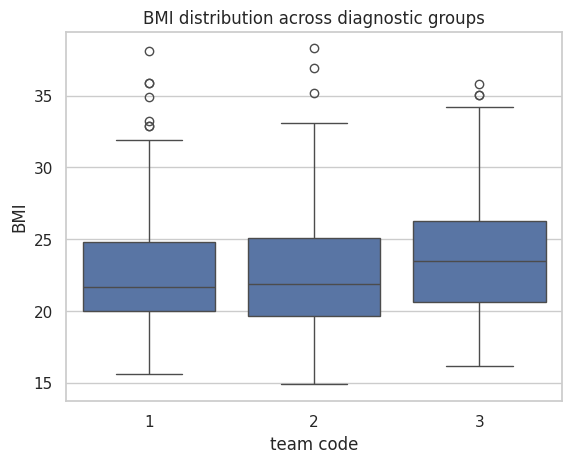

In [13]:
#plotting BMI distribution across diagnostic groups

sns.boxplot(x="team code", y="BMI", data=df)
plt.title("BMI distribution across diagnostic groups")
plt.show()

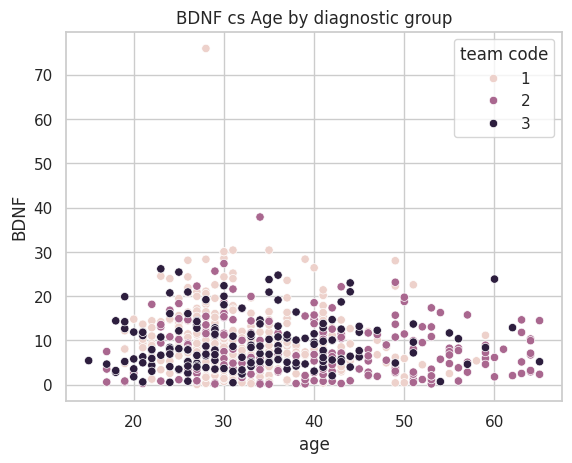

In [15]:
sns.scatterplot(x="age", y="BDNF", hue="team code", data=df)
plt.title("BDNF cs Age by diagnostic group")
plt.show()

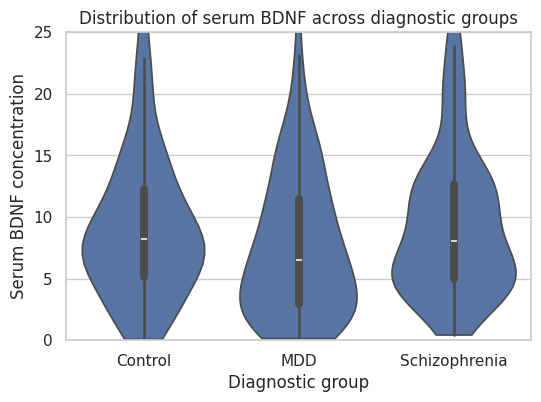

In [20]:
plt.figure(figsize=(6,4))

df['group'] = df['team code'].map({
    1: 'Control',
    2: 'MDD',
    3: 'Schizophrenia'
})

sns.violinplot(
    x='group',
    y='BDNF',
    data=df,
    inner='box',
    cut=0
)

plt.ylim(0,25)
plt.xlabel("Diagnostic group")
plt.ylabel("Serum BDNF concentration")
plt.title("Distribution of serum BDNF across diagnostic groups")
plt.show()

In [23]:
df.groupby('group')['BDNF'].agg(
    mean='mean',
    median='median',
    n='count'
)

,mean,median,n
group,,,
Control,9.568853,8.230667,417
MDD,7.806189,6.541000,210
Schizophrenia,9.342487,8.091502,161


## BDNF Concentration Mean & Medium per Group
Both the mean and median seem to be highest for the Control group. \
The concentration for the MDD group varies more towards 0 than the concentration for the Schizophrenia group (compared to the control group).